# How does a simple model behave?

To improve my intuition for how the fitness model behaves, I decided to generate some sample data and visualize their predicted frequency values using fixed beta values for a single predictor.
To do this, I need to have a sample of viruses that each have an assigned fitness predictor value.
Then I need to select a range of possible beta values to use.
Finally, I need to generate the predicted frequencies from the model with each beta value using the strain predictor values.

This approach requires a lot of assumptions and it might be easier to just start with a comparison of how beta values alter the predicted growth of a single virus across a range of plausible frequencies.
Viruses can range in frequency from 0.01 to 0.05.
Beta values can range from -2 to 2.

## Visualize the effects of beta values on a single virus

In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# Configure matplotlib theme.
sns.set_style("ticks")
fontsize = 14
matplotlib_params = {
    'axes.labelsize': fontsize,
    'font.size': fontsize,
    'legend.fontsize': 12,
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'text.usetex': False,
    'figure.figsize': [6, 4],
    'savefig.dpi': 300,
    'figure.dpi': 120,
    'text.usetex': False
}

plt.rcParams.update(matplotlib_params)

# Turn off spines for all plots.
plt.rc("axes.spines", top=False, right=False)

Viruses can range in frequency from 0.01 to 0.05. Beta values can range from -2 to 2.

In [3]:
frequency = np.arange(0.01, 0.06, 0.01)
beta = np.arange(-2, 3, 1)

In [4]:
frequency

array([ 0.01,  0.02,  0.03,  0.04,  0.05])

In [5]:
beta

array([-2, -1,  0,  1,  2])

The growth formula is just:

$$
x_{i}(t + \Delta{t}) = x_{i}(t)\exp(\beta{f_{i}})
$$

For the purpose of this exercise, let's assume the fitness value for this virus, $f_{i}$, is standardized such that its mean is zero.
We also want to see how the model behaves for a range of these values.

In [6]:
fitness = np.arange(-1, 2, 1)

In [7]:
fitness

array([-1,  0,  1])

In [8]:
df = pd.DataFrame(list(itertools.product(frequency, beta, fitness)), columns=["frequency", "beta", "fitness"])

In [9]:
df.head()

,frequency,beta,fitness
0,0.01,-2,-1
1,0.01,-2,0
2,0.01,-2,1
3,0.01,-1,-1
4,0.01,-1,0


Calculate the expected growth for each combination of values represented by a row in the data frame.

In [10]:
df["projected_frequency"] = df.apply(lambda record: record["frequency"] * np.exp(record["beta"] * record["fitness"]), axis=1)

Plot the resulting expected frequency by the corresponding initial frequency.
Facet the results by the beta and fitness values.

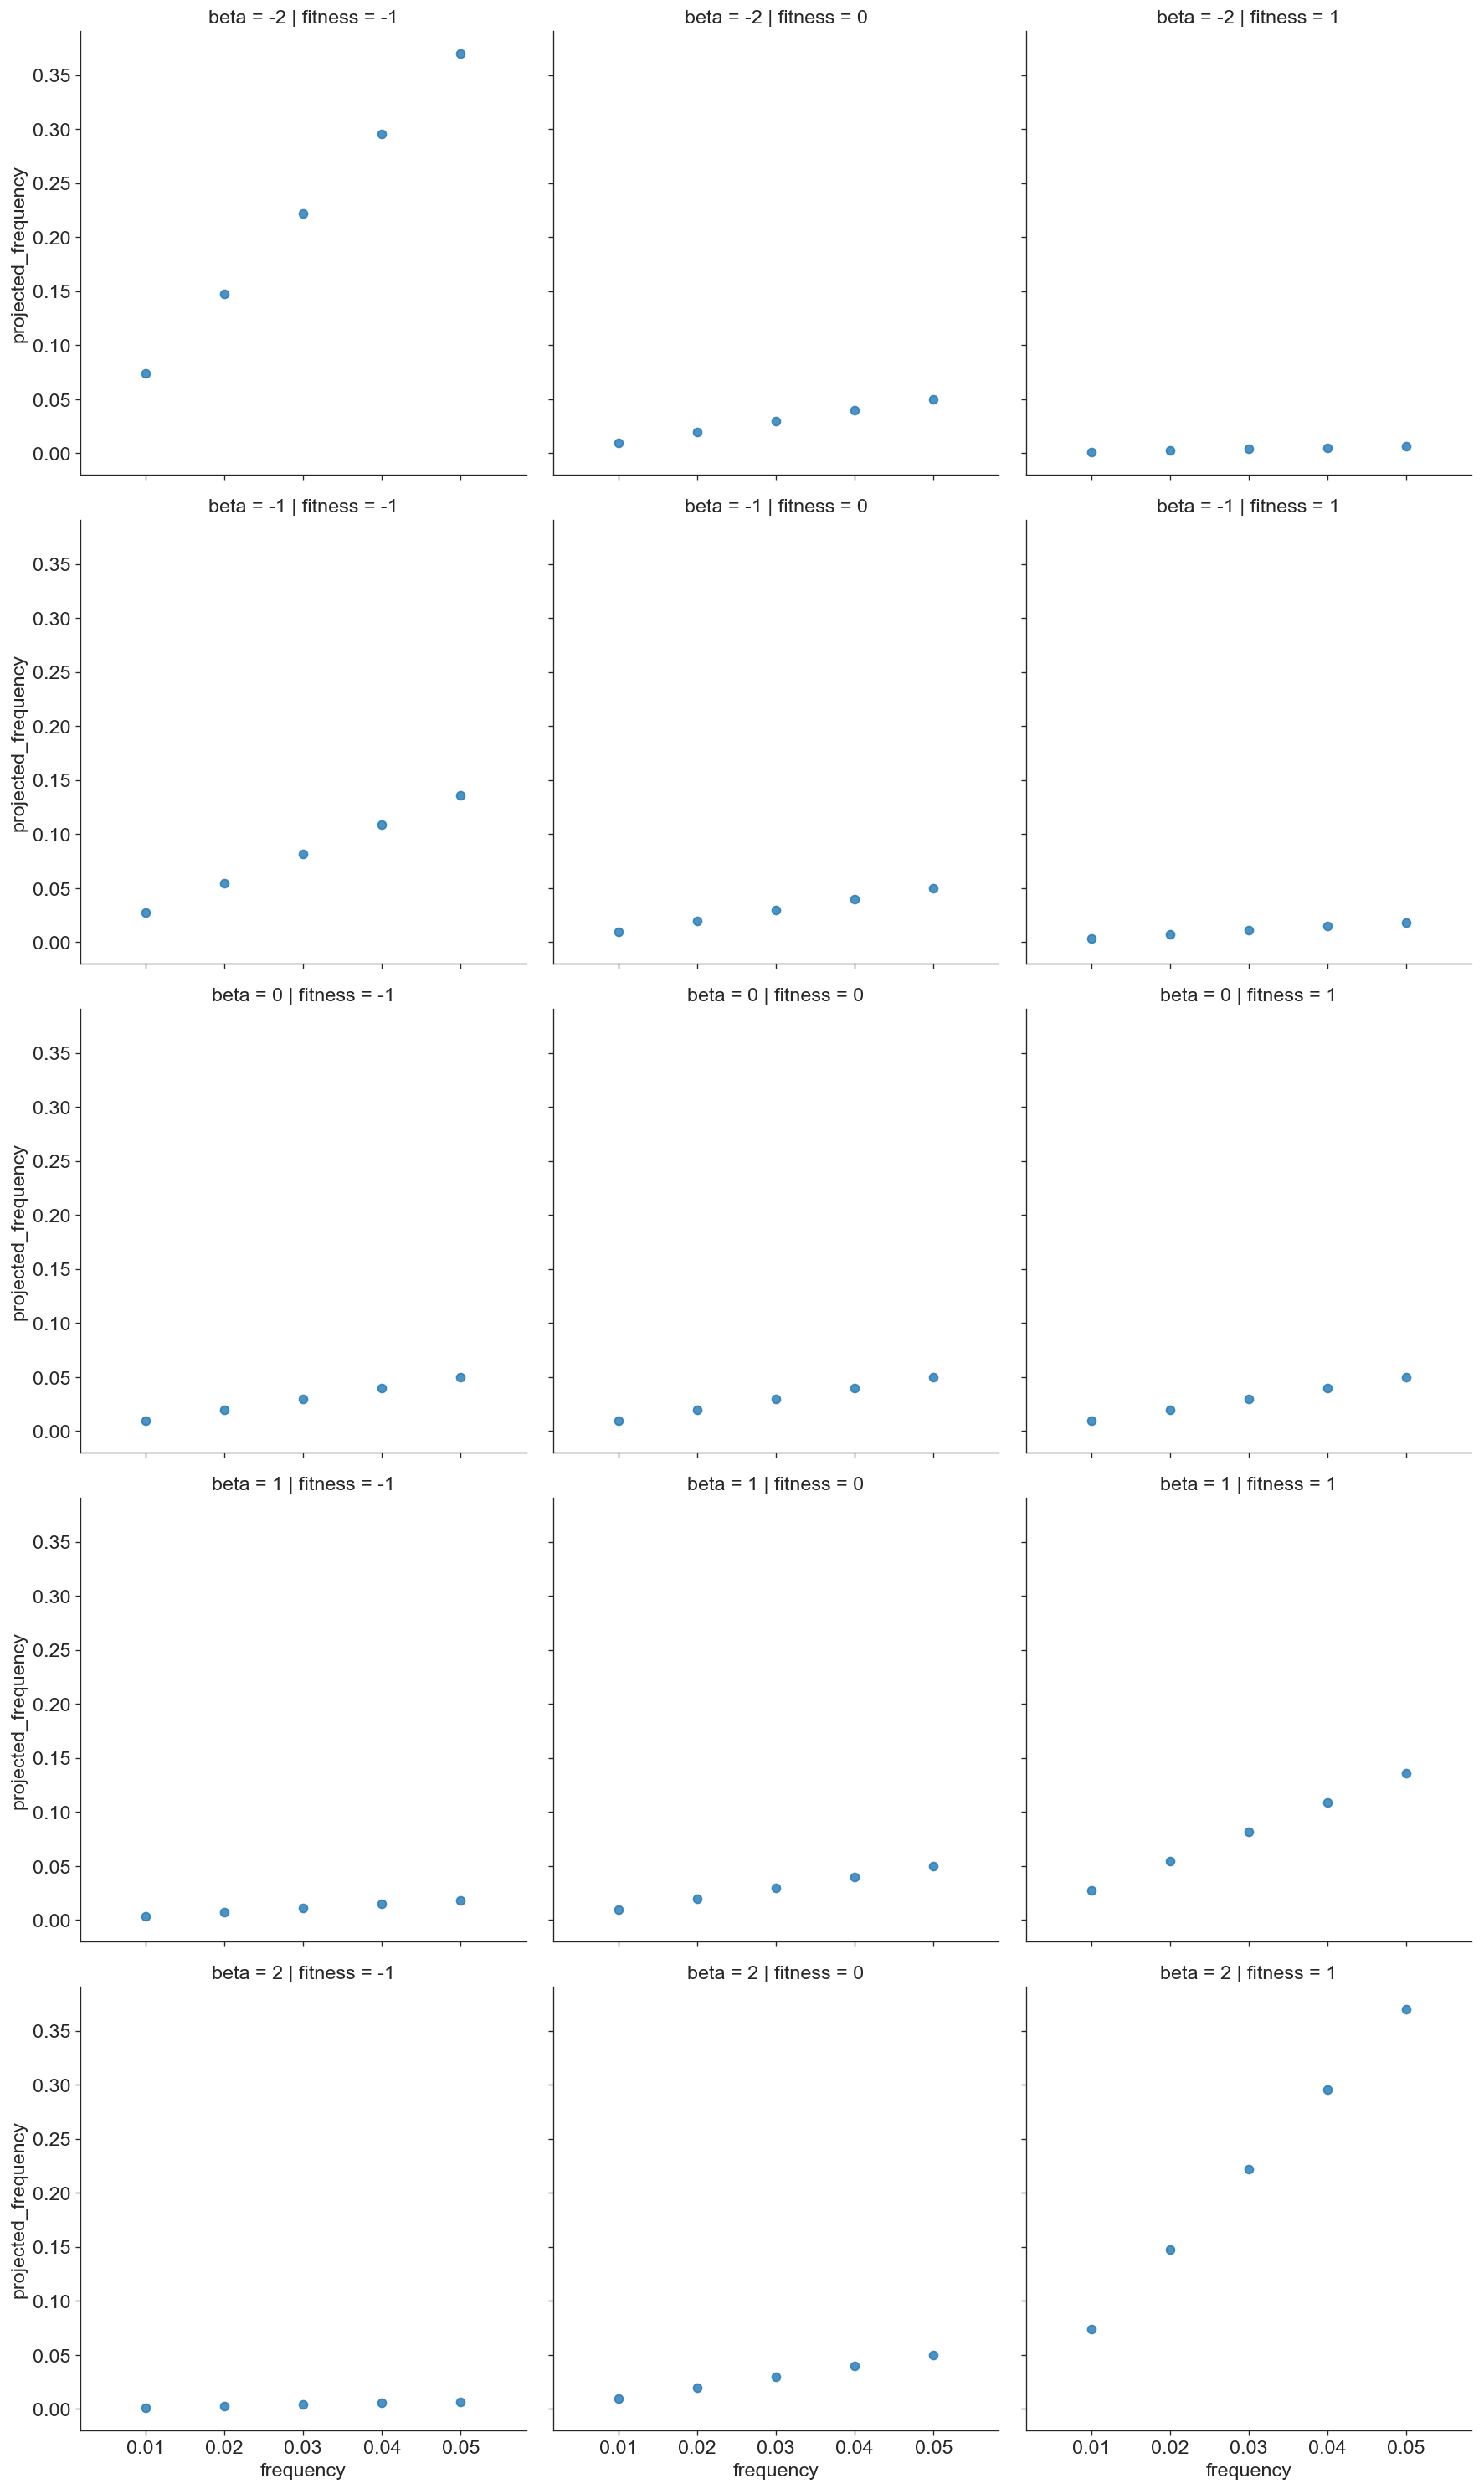

In [11]:
sns.lmplot(
    "frequency",
    "projected_frequency",
    df,
    row="beta",
    col="fitness",
    fit_reg=False
)

Another way to visualize the same results would be to plot a line with expected frequency on the y axis, fitness on the x axis, and different colors for each beta.

In [12]:
beta = np.arange(0, 2.5, 0.5)
fitness = np.arange(-1, 1.1, 0.1)

In [13]:
df = pd.DataFrame(list(itertools.product(frequency, beta, fitness)), columns=["frequency", "beta", "fitness"])
df["projected_frequency"] = df.apply(lambda record: record["frequency"] * np.exp(record["beta"] * record["fitness"]), axis=1)

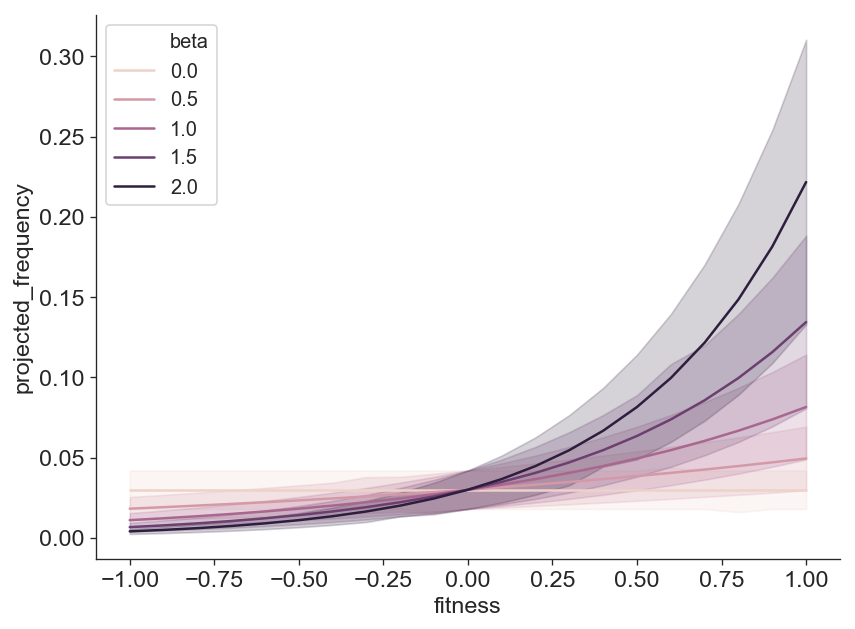

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.lineplot(
    x="fitness",
    y="projected_frequency",
    data=df,
    hue="beta",
    ax=ax,
    legend="full"
)

Plot the change in frequency by fitness and beta values.

In [15]:
df["delta_frequency"] = df["projected_frequency"] - df["frequency"]

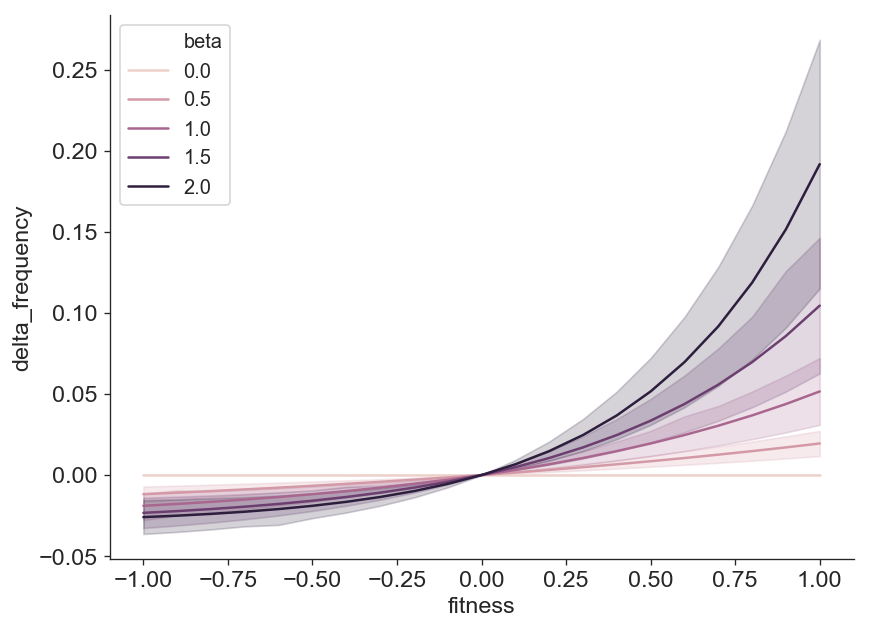

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.lineplot(
    x="fitness",
    y="delta_frequency",
    data=df,
    hue="beta",
    ax=ax,
    legend="full"
)

In [19]:
from scipy.special import logit

In [20]:
df["logit_projected_frequency"] = logit(df["projected_frequency"])

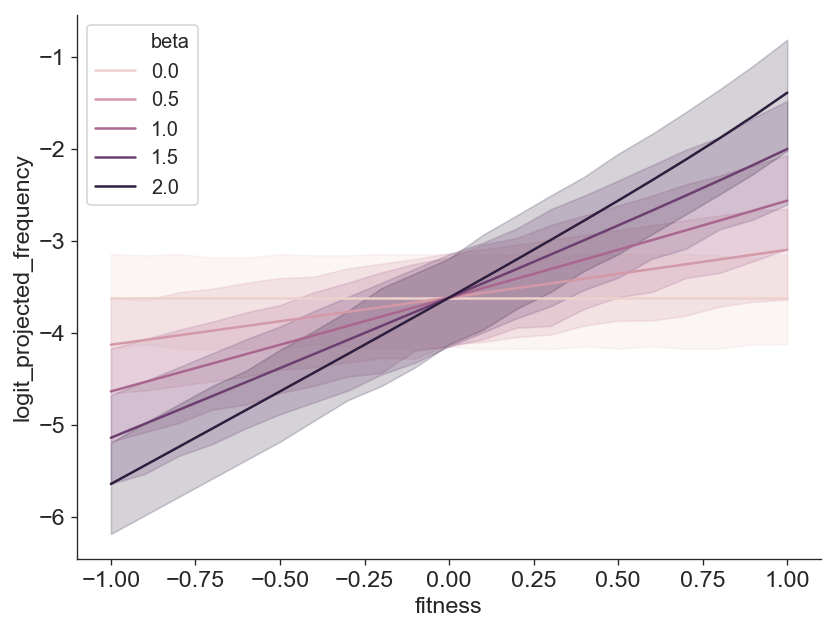

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.lineplot(
    x="fitness",
    y="logit_projected_frequency",
    data=df,
    hue="beta",
    ax=ax,
    legend="full"
)

## Inspect normalization factors

To figure out how the model's beta parameters should behave with changing clade sizes, I generated some sample data and inspect the corresponding effect of normalization to 1 for different numbers of viruses.

First, I sampled 100 viruses and their fitnesses.

In [21]:
n_viruses = 100
frequencies = np.repeat(1.0 / n_viruses, n_viruses)
fitnesses = np.random.normal(size=n_viruses)

In [22]:
frequencies

array([ 0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
        0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
        0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
        0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
        0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
        0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
        0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
        0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
        0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
        0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
        0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01])

(array([  5.,   4.,   8.,  13.,  14.,  13.,  21.,  11.,   8.,   3.]),
 array([-2.35477586, -1.91995534, -1.48513483, -1.05031431, -0.6154938 ,
        -0.18067328,  0.25414723,  0.68896775,  1.12378826,  1.55860878,
         1.99342929]),
 <a list of 10 Patch objects>)

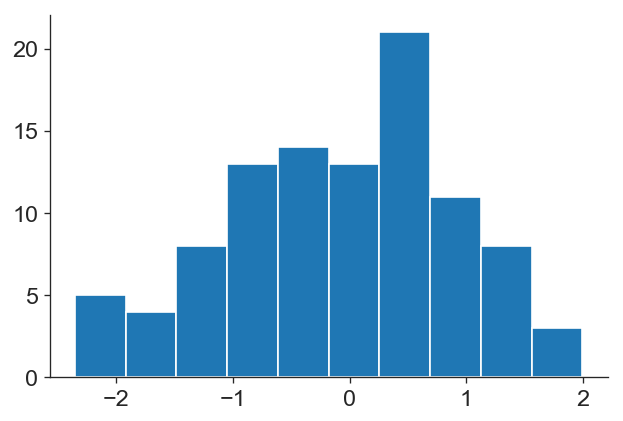

In [24]:
plt.hist(fitnesses)

In [25]:
future_frequencies = frequencies * np.exp(fitnesses)

(array([ 44.,  21.,  13.,  11.,   5.,   3.,   0.,   2.,   0.,   1.]),
 array([ 0.00094915,  0.0081949 ,  0.01544065,  0.0226864 ,  0.02993214,
         0.03717789,  0.04442364,  0.05166939,  0.05891514,  0.06616089,
         0.07340664]),
 <a list of 10 Patch objects>)

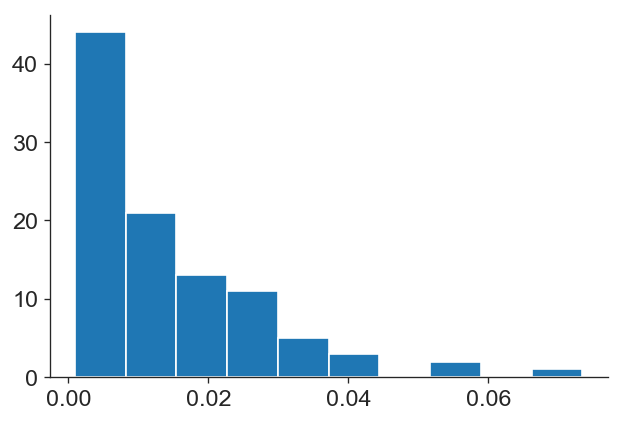

In [27]:
plt.hist(future_frequencies)

In [28]:
frequencies.sum()

0.99999999999999989

In [29]:
future_frequencies.sum()

1.4079108315512598

In [31]:
frequencies * np.exp(fitnesses)

7.1895907939521058

In [43]:
-np.sum(np.log(frequencies) - fitnesses) / n_viruses

4.5275711053505008

In [47]:
(frequencies * ((1 / 1.41) * np.exp(fitnesses))).sum()

0.99851832024912035

Now try with more viruses.

In [48]:
n_viruses = 200
frequencies = np.repeat(1.0 / n_viruses, n_viruses)
fitnesses = np.random.normal(size=n_viruses)
future_frequencies = frequencies * np.exp(fitnesses)
future_frequencies.sum()

1.6661172845189909

In [49]:
n_viruses = 400
frequencies = np.repeat(1.0 / n_viruses, n_viruses)
fitnesses = np.random.normal(size=n_viruses)
future_frequencies = frequencies * np.exp(fitnesses)
future_frequencies.sum()

1.7431364603303592

In [110]:
n_viruses = np.arange(100, 10001, 100)
normalization_sums = []
beta = 0.5
alpha = -0.12

for n_virus in n_viruses:
    frequencies = np.repeat(1.0 / n_virus, n_virus)
    fitnesses = np.random.normal(size=n_virus)
    future_frequencies = frequencies * np.exp(alpha - beta * fitnesses)
    normalization_sums.append(future_frequencies.sum())

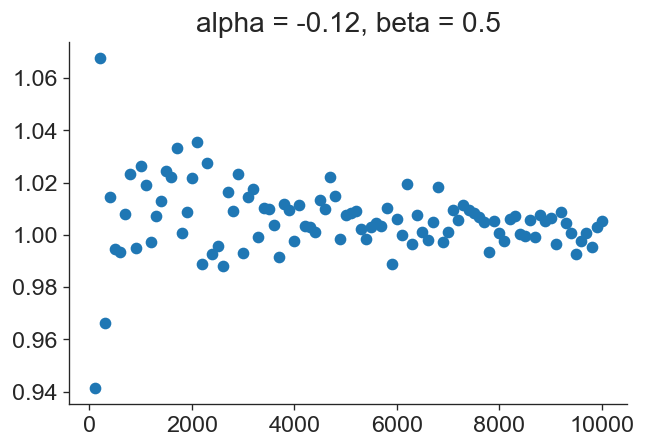

In [111]:
plt.plot(n_viruses, normalization_sums, "o")
plt.title("alpha = %s, beta = %s" % (alpha, beta))

(array([  2.,   3.,  25.,  56.,  11.,   2.,   0.,   0.,   0.,   1.]),
 array([ 1.07829717,  1.09510017,  1.11190318,  1.12870618,  1.14550918,
         1.16231218,  1.17911518,  1.19591818,  1.21272119,  1.22952419,
         1.24632719]),
 <a list of 10 Patch objects>)

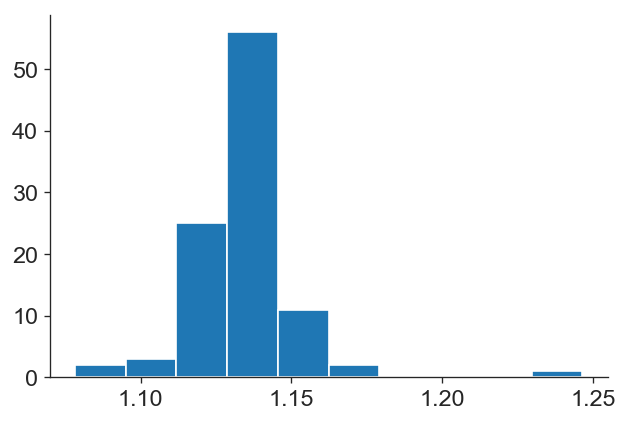

In [74]:
plt.hist(normalization_sums)

In [65]:
np.mean(normalization_sums)

1.6489939603055266

In [63]:
np.e

2.718281828459045

In [66]:
np.sqrt(np.e)

1.6487212707001282

In [68]:
np.exp(0.5)

1.6487212707001282

In [69]:
future_frequencies = frequencies * np.exp(fitnesses)

In [71]:
future_frequencies.sum()

1.6027812598040669

In [112]:
len(frequencies)

10000

In [113]:
len(future_frequencies)

10000

In [118]:
n_viruses = 400
frequencies = np.repeat(1.0 / n_viruses, n_viruses)
fitnesses = np.random.normal(size=n_viruses)
future_frequencies = frequencies * np.exp(alpha - beta * fitnesses)
future_frequencies.sum()

1.0359020192182373

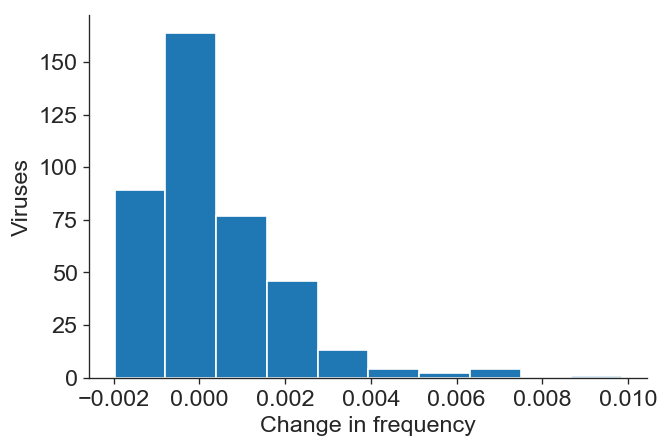

In [128]:
plt.hist(future_frequencies - np.array(frequencies))
plt.xlabel("Change in frequency")
plt.ylabel("Viruses")

In [120]:
alpha

-0.12

In [121]:
beta

0.5

In [123]:
1 / np.exp(alpha)

1.1274968515793757

In [124]:
future_frequencies = frequencies * np.exp(beta * fitnesses)

In [127]:
np.log(1 / future_frequencies.sum())

-0.11625113149823542

The inclusion of alpha allows us to make a fitness model like so:

$$
X_{v}(t + \Delta{t}) = \sum_{i}x_{i}\exp{(\alpha + \beta{f_{i}\Delta{t}})}
$$

This works out to mean the same as the following:

$$
X_{v}(t + \Delta{t}) = \sum_{i}x_{i}\exp{(\alpha)}\exp{(\beta{f_{i}\Delta{t}})}
$$

And since the exponential of $\alpha$ is a constant, we can just rename this to $\alpha$.
This change allows our model equation to follow the standard format for an intercept and beta values in an exponential equation.

$$
X_{v}(t + \Delta{t}) = \sum_{i}x_{i}\alpha\exp{(\beta{f_{i}\Delta{t}})}
$$


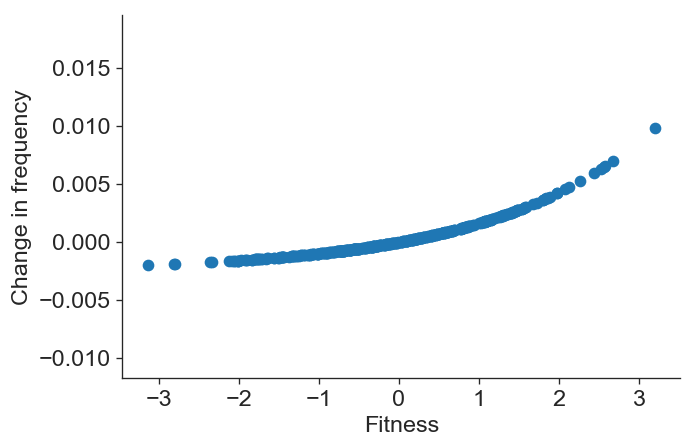

In [132]:
plt.scatter(fitnesses, (future_frequencies - np.array(frequencies)))
plt.xlabel("Fitness")
plt.ylabel("Change in frequency")

To determine whether we expect the value of $\beta$ to scale with the number of strains in a tree (independent of variation in clade number or sizes), I solved for $\beta$ from the original growth equation as follows.

$$
\sum_{i}x_{i}\exp{(\beta{f_{i}\Delta{t}})} = 1
$$

If $\Delta{t} = 1$, then we can eliminate that variable and solve for $\beta$ by first find the log of both sides.

$$
\sum_{i}x_{i}\exp{(\beta{f_{i}})} = 1
$$

$$
\sum_{i}(\log{x_{i}} + \beta{f_{i}}) = \log{1}
$$

$$
\sum_{i}\log{x_{i}} + \sum_{i}\beta{f_{i}} = 0
$$

$$
\sum_{i}(\log{x_{i}}) + n\beta\sum_{i}f_{i} = 0
$$

$$
n\beta\sum_{i}f_{i} = -\sum_{i}(\log{x_{i}})
$$

$$
\beta = \frac{-\sum_{i}(\log{x_{i}})}{n\sum_{i}f_{i}}
$$

Since both the sums in the numerator and the denominator sum over the same number of strains, they are always proportional to each other.
This leaves $\beta$ to scale by a factor of $1 / n$.

Unfortunately, this math is incorrect because [the log of a sum is not the sum of logs](https://en.wikipedia.org/wiki/List_of_logarithmic_identities#Summation/subtraction).

What if, instead, I fixed $\beta$ and allowed $\alpha$ to vary with the number of viruses?
If this approach allows $\beta$ to remain fixed and allows the variation due to the number of viruses to be accounted for by $\alpha$, maybe this provides a solution to the problem above that may not be solveable analytically.

In [133]:
n_viruses = np.arange(100, 10001, 100)
normalization_sums = []
beta = 0.5
alphas = []

for n_virus in n_viruses:
    frequencies = np.repeat(1.0 / n_virus, n_virus)
    fitnesses = np.random.normal(size=n_virus)
    future_frequencies = frequencies * np.exp(beta * fitnesses)
    alpha = np.log(1 / future_frequencies.sum())
    alphas.append(alpha)

    future_frequencies_with_alpha = frequencies * np.exp(alpha + beta * fitnesses)
    normalization_sums.append(future_frequencies_with_alpha.sum())

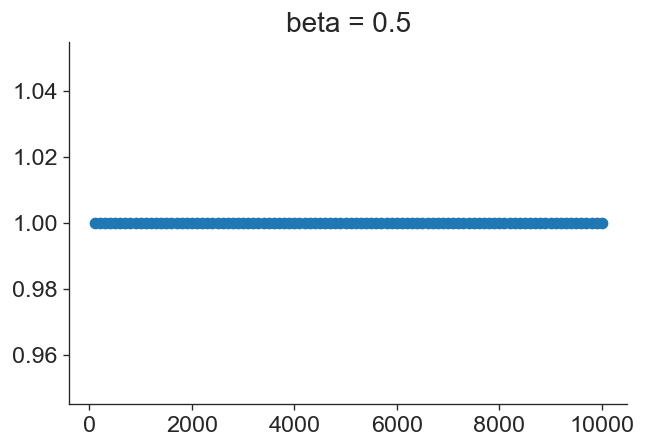

In [135]:
# Confirm that all future frequencies with variable alphas sum to 1.
plt.plot(n_viruses, normalization_sums, "o")
plt.title("beta = %s" % beta)

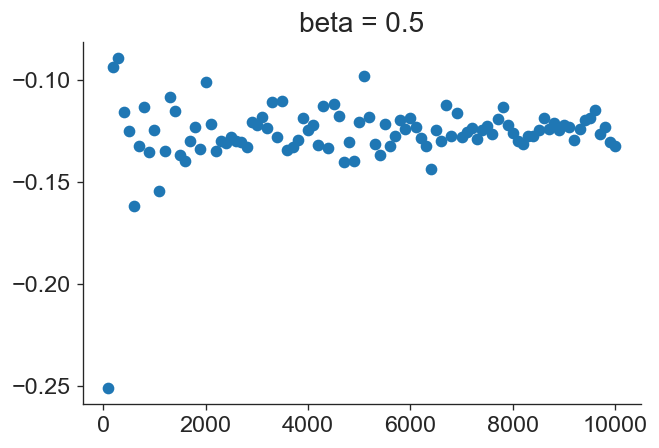

In [136]:
# Plot alphas by the number of viruses.
plt.plot(n_viruses, alphas, "o")
plt.title("beta = %s" % beta)

Repeat this experiment with a range of betas.

In [137]:
n_viruses = np.arange(100, 10001, 100)
betas = [0.1, 0.5, 1.0, 1.5]
records = []

for n_virus in n_viruses:
    for beta in betas:
        frequencies = np.repeat(1.0 / n_virus, n_virus)
        fitnesses = np.random.normal(size=n_virus)
        future_frequencies = frequencies * np.exp(beta * fitnesses)
        alpha = np.log(1 / future_frequencies.sum())

        future_frequencies_with_alpha = frequencies * np.exp(alpha + beta * fitnesses)
        sum_with_alpha = future_frequencies_with_alpha.sum()
        
        record = {
            "alpha": alpha,
            "beta": beta,
            "n": n_virus,
            "sum_with_alpha": sum_with_alpha
        }
        records.append(record)

In [139]:
alpha_df = pd.DataFrame(records)

In [141]:
alpha_df.head()

,alpha,beta,n,sum_with_alpha
0,-0.020434,0.1,100,1.0
1,-0.188777,0.5,100,1.0
2,-0.753066,1.0,100,1.0
3,-1.086234,1.5,100,1.0
4,0.002648,0.1,200,1.0


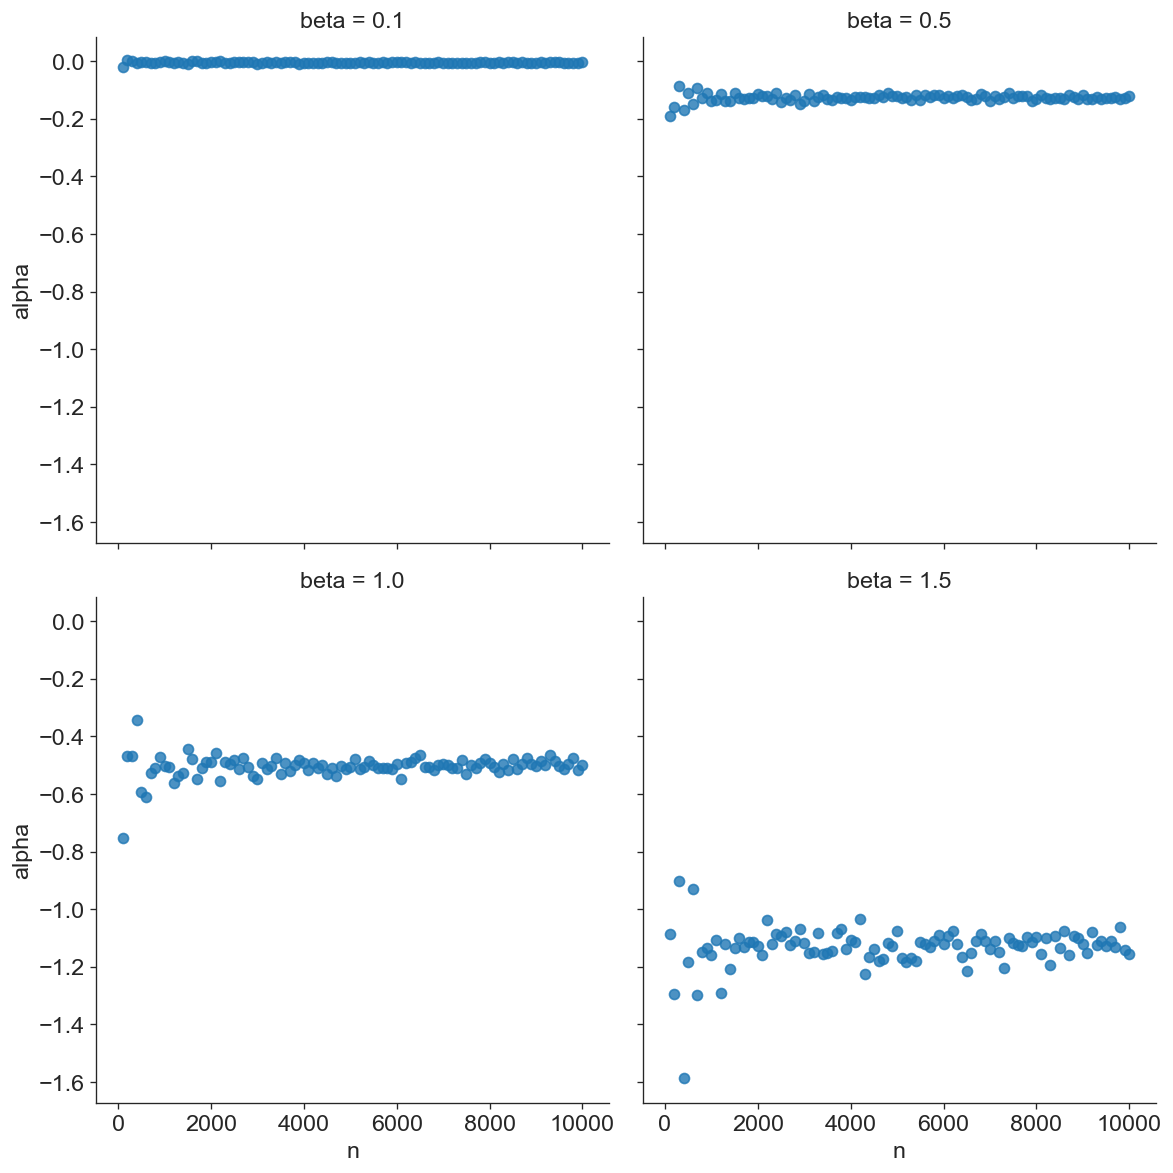

In [144]:
sns.lmplot("n", "alpha", alpha_df, col="beta", col_wrap=2, fit_reg=False)

In [152]:
grouped_df = alpha_df.groupby("beta")

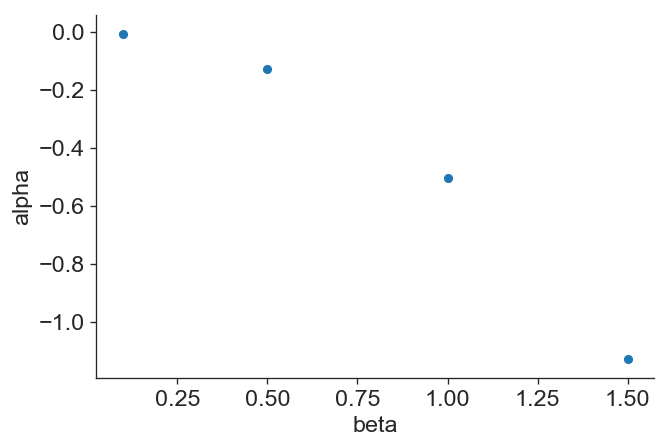

In [156]:
grouped_df.aggregate({"alpha": np.mean, "beta": np.mean}).plot(x="beta", y="alpha", kind="scatter")

This result does not tell us whether we should expect $\beta$ itself to vary with the number of viruses in the absence of an intercept parameter like $\alpha$.
Since it may not be possible to easily solve for $\beta$ analytically, we can try to test the hypothesis that $\beta$ varies with number of viruses through simulation.

First, we define three clades with their own starting frequencies and fitnesses:

  - Clade 1 starts at 10% with fitness of +1
  - Clade 2 starts at 30% with fitness of 0
  - Clade 3 starts at 60% with fitness of -1
 
Then, we sample N viruses from each clade proportional to the clade's starting frequency and assign each clade's virus a fixed fitness value matching the clade's fitness.
We fix a $\beta$ value to 1 and project the future frequencies of the clades.
Then, we sample 100 times as many viruses as before, assign fitnesses to those viruses, and project future frequencies with the same $\beta$.
If the future frequencies are different just because we increased the number of viruses, this tells us that $\beta$ has to change proportionally to the number of viruses.

In [250]:
# Define initial values.
n_clades = 3
clade_frequencies = np.array([0.1, 0.3, 0.6])
clade_fitnesses = np.array([1.0, 0.0, -1.0])
beta = 0.5

# Create individual viruses.
n_viruses = 100
viral_frequencies = []
viral_fitnesses = []

for clade in range(n_clades):
    n_clade_viruses = int(clade_frequencies[clade] * n_viruses)
    viral_frequencies.extend([1.0 / n_viruses] * n_clade_viruses)
    viral_fitnesses.extend([clade_fitnesses[clade]] * n_clade_viruses)

viral_frequencies = np.array(viral_frequencies)
viral_fitnesses = np.array(viral_fitnesses)
clade_ranges = map(int, [0.0] + list(np.cumsum(clade_frequencies) * n_viruses))

In [253]:
viral_fitnesses.mean()

-0.5

In [255]:
viral_fitnesses.std()

0.67082039324993692

In [258]:
viral_fitnesses = (viral_fitnesses - viral_fitnesses.mean()) / viral_fitnesses.std()

In [259]:
clade_ranges

[0, 10, 40, 100]

In [260]:
viral_frequencies.sum()

0.99999999999999989

In [261]:
viral_fitnesses

array([ 2.23606798,  2.23606798,  2.23606798,  2.23606798,  2.23606798,
        2.23606798,  2.23606798,  2.23606798,  2.23606798,  2.23606798,
        0.74535599,  0.74535599,  0.74535599,  0.74535599,  0.74535599,
        0.74535599,  0.74535599,  0.74535599,  0.74535599,  0.74535599,
        0.74535599,  0.74535599,  0.74535599,  0.74535599,  0.74535599,
        0.74535599,  0.74535599,  0.74535599,  0.74535599,  0.74535599,
        0.74535599,  0.74535599,  0.74535599,  0.74535599,  0.74535599,
        0.74535599,  0.74535599,  0.74535599,  0.74535599,  0.74535599,
       -0.74535599, -0.74535599, -0.74535599, -0.74535599, -0.74535599,
       -0.74535599, -0.74535599, -0.74535599, -0.74535599, -0.74535599,
       -0.74535599, -0.74535599, -0.74535599, -0.74535599, -0.74535599,
       -0.74535599, -0.74535599, -0.74535599, -0.74535599, -0.74535599,
       -0.74535599, -0.74535599, -0.74535599, -0.74535599, -0.74535599,
       -0.74535599, -0.74535599, -0.74535599, -0.74535599, -0.74

In [262]:
# Calculate future frequencies
projected_frequencies = viral_frequencies * np.exp(beta * viral_fitnesses)
projected_frequencies = projected_frequencies / projected_frequencies.sum()

In [263]:
# Find projected frequencies per clade.
projected_clade_frequencies = []
for clade in range(n_clades):
    start = clade_ranges[clade]
    end = clade_ranges[clade + 1]
    projected_clade_frequency = projected_frequencies[start:end].sum()
    print("Clade %s: %.2f" % (clade + 1, projected_clade_frequency))
    projected_clade_frequencies.append(projected_clade_frequency)

Clade 1: 0.26
Clade 2: 0.38
Clade 3: 0.36


In [264]:
projected_clade_frequencies

[0.26490280331909188, 0.37714105736908543, 0.35795613931182274]

In [265]:
clade_frequencies

array([ 0.1,  0.3,  0.6])

Now, repeat this experiment with 100 times as many viruses per clade and find the projected clade frequencies.

In [266]:
# Create individual viruses.
n_viruses = 100 * 100
viral_frequencies = []
viral_fitnesses = []

for clade in range(n_clades):
    n_clade_viruses = int(clade_frequencies[clade] * n_viruses)
    viral_frequencies.extend([1.0 / n_viruses] * n_clade_viruses)
    viral_fitnesses.extend([clade_fitnesses[clade]] * n_clade_viruses)

viral_frequencies = np.array(viral_frequencies)
viral_fitnesses = np.array(viral_fitnesses)
viral_fitnesses = (viral_fitnesses - viral_fitnesses.mean()) / viral_fitnesses.std()
clade_ranges = map(int, [0.0] + list(np.cumsum(clade_frequencies) * n_viruses))

# Calculate future frequencies
projected_frequencies = viral_frequencies * np.exp(beta * viral_fitnesses)
projected_frequencies = projected_frequencies / projected_frequencies.sum()

# Find projected frequencies per clade.
projected_clade_frequencies = []
for clade in range(n_clades):
    start = clade_ranges[clade]
    end = clade_ranges[clade + 1]
    projected_clade_frequency = projected_frequencies[start:end].sum()
    print("Clade %s: %.2f" % (clade + 1, projected_clade_frequency))
    projected_clade_frequencies.append(projected_clade_frequency)

Clade 1: 0.26
Clade 2: 0.38
Clade 3: 0.36


In [246]:
viral_fitnesses

array([ 1.,  1.,  1., ..., -1., -1., -1.])

I got the exact same results with 100 times as many viruses.
What happens if there is any error introduced to the fitnesses?

In [277]:
# Create individual viruses.
n_viruses = 1000
viral_frequencies = []
viral_fitnesses = []

for clade in range(n_clades):
    n_clade_viruses = int(clade_frequencies[clade] * n_viruses)
    viral_frequencies.extend([1.0 / n_viruses] * n_clade_viruses)
    viral_fitnesses.extend(list(np.random.normal(clade_fitnesses[clade], 0.5, size=n_clade_viruses)))

viral_frequencies = np.array(viral_frequencies)
viral_fitnesses = np.array(viral_fitnesses)
viral_fitnesses = (viral_fitnesses - viral_fitnesses.mean()) / viral_fitnesses.std()
clade_ranges = map(int, [0.0] + list(np.cumsum(clade_frequencies) * n_viruses))

# Calculate future frequencies
projected_frequencies = viral_frequencies * np.exp(beta * viral_fitnesses)
projected_frequencies = projected_frequencies / projected_frequencies.sum()

# Find projected frequencies per clade.
projected_clade_frequencies = []
for clade in range(n_clades):
    start = clade_ranges[clade]
    end = clade_ranges[clade + 1]
    projected_clade_frequency = projected_frequencies[start:end].sum()
    print("Clade %s: %.2f" % (clade + 1, projected_clade_frequency))
    projected_clade_frequencies.append(projected_clade_frequency)

Clade 1: 0.23
Clade 2: 0.37
Clade 3: 0.41
